# Aligning SMPMF

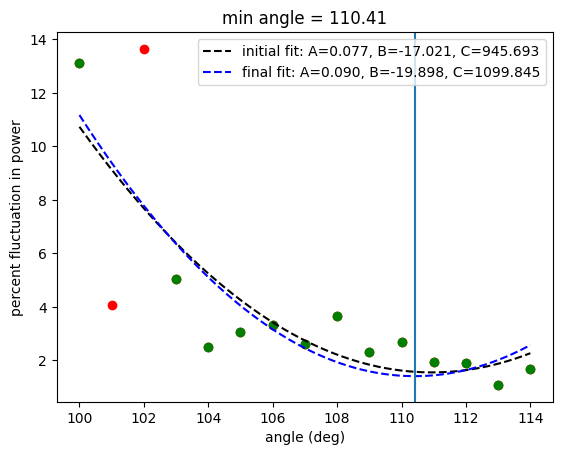

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import zscore

def parabola(x,A,B,C):
    return A*x**2 + B*x + C

angles, fluctuations = np.load(r"C:\Users\marku\Desktop\Code\PMF alignment data\new fiber\input_rotation_100_115_1deg.npy")
angles_cont = np.linspace(angles[0], angles[-1], 500)

plt.scatter(angles,fluctuations, color='red')
plt.xlabel('angle (deg)')
plt.ylabel('percent fluctuation in power')

popt, _ = curve_fit(parabola, angles, fluctuations)
initial_fit = parabola(angles, *popt) # fit initially
initial_fit_cont = parabola(angles_cont, *popt)
residuals = fluctuations - initial_fit # calculate deviation of data from fitted curve

plt.plot(angles_cont, initial_fit_cont, color='black', linestyle='--',
        label='initial fit: A=%5.3f, B=%5.3f, C=%5.3f' % tuple(popt))

z_scores = zscore(residuals) 
filtered_indices = np.abs(z_scores) < 2 # if the z scores are above 2, filter them out - they are too far from the curve

angles_filtered = angles[filtered_indices]
fluctuations_filtered = fluctuations[filtered_indices]

plt.scatter(angles_filtered, fluctuations_filtered, color='green')

popt, _ = curve_fit(parabola, angles_filtered, fluctuations_filtered)
final_fit = parabola(angles_cont, *popt) # fit initially

plt.plot(angles_cont, final_fit, color='blue', linestyle='--',
        label='final fit: A=%5.3f, B=%5.3f, C=%5.3f' % tuple(popt))

a_min_f = np.argmin(final_fit)
min_angle = angles_cont[a_min_f]

plt.axvline(min_angle)

plt.title('min angle = {:.2f}'.format(min_angle))
plt.legend()
plt.show()

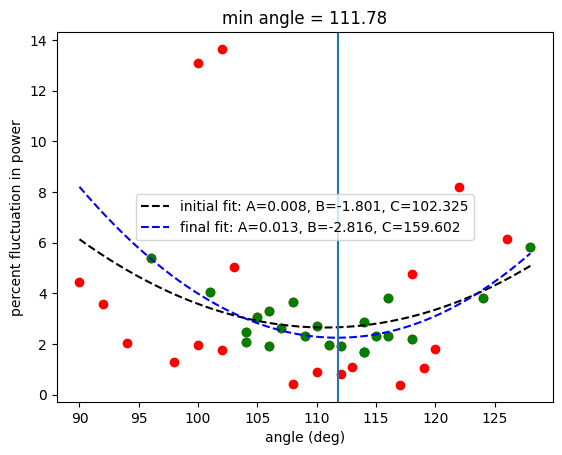

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import zscore

def parabola(x,A,B,C):
    return A*x**2 + B*x + C

path = r"C:\Users\marku\Desktop\Code\PMF alignment data\new fiber"

angles_tot = np.array([])
flucs_tot = np.array([])

for f in os.listdir(path):
    angles, fluctuations = np.load(os.path.join(path,f))
    angles_tot = np.concatenate((angles_tot, angles))
    flucs_tot = np.concatenate((flucs_tot, fluctuations))

angles_cont = np.linspace(angles_tot[np.argmin(angles_tot)], angles_tot[np.argmax(angles_tot)], 500)

plt.scatter(angles_tot,flucs_tot, color='red')
plt.xlabel('angle (deg)')
plt.ylabel('percent fluctuation in power')

popt, _ = curve_fit(parabola, angles_tot, flucs_tot)
initial_fit = parabola(angles_tot, *popt) # fit initially
initial_fit_cont = parabola(angles_cont, *popt)
residuals = flucs_tot - initial_fit # calculate deviation of data from fitted curve

plt.plot(angles_cont, initial_fit_cont, color='black', linestyle='--',
        label='initial fit: A=%5.3f, B=%5.3f, C=%5.3f' % tuple(popt))

z_scores = zscore(residuals) 
filtered_indices = np.abs(z_scores) < 0.5 # if the z scores are above 2, filter them out - they are too far from the curve

angles_filtered = angles_tot[filtered_indices]
fluctuations_filtered = flucs_tot[filtered_indices]

plt.scatter(angles_filtered, fluctuations_filtered, color='green')

popt, _ = curve_fit(parabola, angles_filtered, fluctuations_filtered)
final_fit = parabola(angles_cont, *popt) # fit initially

plt.plot(angles_cont, final_fit, color='blue', linestyle='--',
        label='final fit: A=%5.3f, B=%5.3f, C=%5.3f' % tuple(popt))

a_min_f = np.argmin(final_fit)
min_angle = angles_cont[a_min_f]

plt.axvline(min_angle)

plt.title('min angle = {:.2f}'.format(min_angle))
plt.legend()
plt.show()

minimum fluctuation: 1.7680817725248883 located at 52.0deg


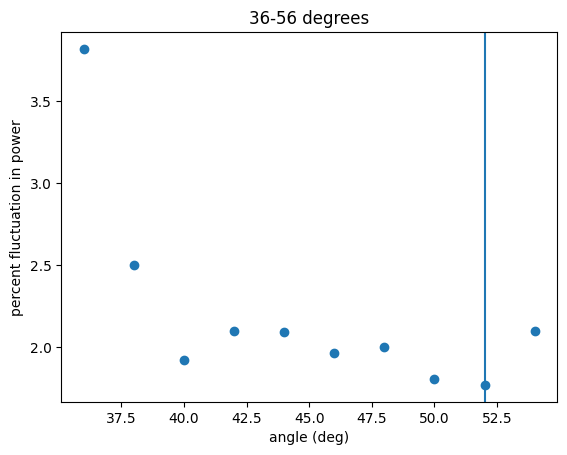

In [4]:
angles, fluctuations = np.load(r"C:\Users\marku\Desktop\Code\PMF alignment data\inputpolarisation_36_56_2deg.npy")
plt.scatter(angles,fluctuations)
plt.xlabel('angle (deg)')
plt.ylabel('percent fluctuation in power')

plt.title('36-56 degrees')

min_f = fluctuations.min()
a_min_f = fluctuations.argmin()
print('minimum fluctuation: {} located at {}deg'.format(min_f, angles[a_min_f]))

plt.axvline(angles[a_min_f])

minimum fluctuation: 2.0085987561045777 located at 140.0deg


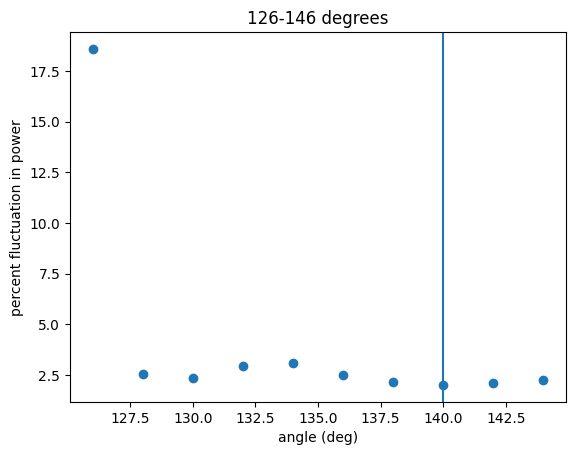

In [5]:
angles, fluctuations = np.load(r"C:\Users\marku\Desktop\Code\PMF alignment data\inputpolarisation_125_145_2deg.npy")
plt.scatter(angles,fluctuations)
plt.xlabel('angle (deg)')
plt.ylabel('percent fluctuation in power')

plt.title('126-146 degrees')

min_f = fluctuations.min()
a_min_f = fluctuations.argmin()
print('minimum fluctuation: {} located at {}deg'.format(min_f, angles[a_min_f]))

plt.axvline(angles[a_min_f])

minimum fluctuation: 1.7407802538998087 located at 130.0deg


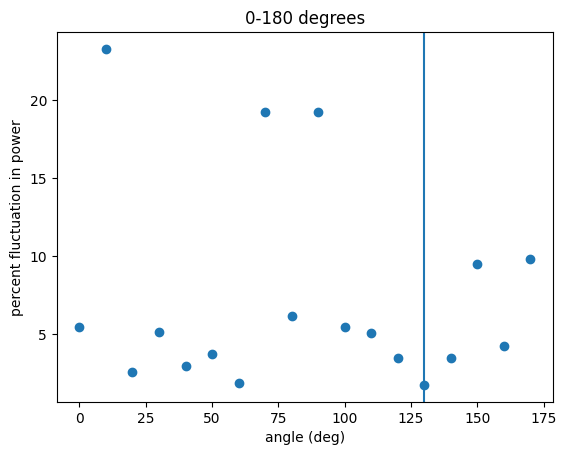

In [6]:
angles, fluctuations = np.load(r"C:\Users\marku\Desktop\Code\PMF alignment data\input_rotation_0_180_10deg.npy")
plt.scatter(angles,fluctuations)
plt.xlabel('angle (deg)')
plt.ylabel('percent fluctuation in power')

plt.title('0-180 degrees')

min_f = fluctuations.min()
a_min_f = fluctuations.argmin()
print('minimum fluctuation: {} located at {}deg'.format(min_f, angles[a_min_f]))

plt.axvline(angles[a_min_f])

minimum fluctuation: 3.146522370027212 located at 134.0deg


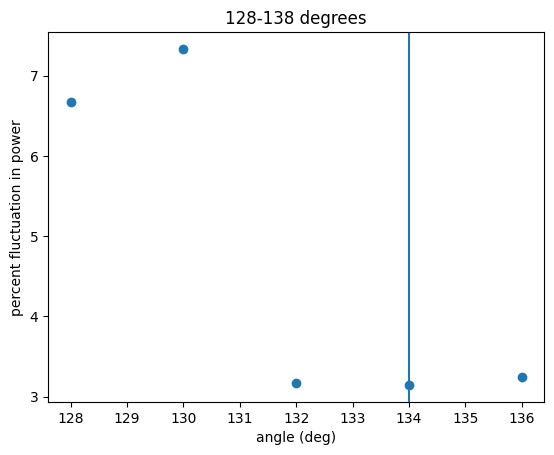

In [7]:
angles, fluctuations = np.load(r"C:\Users\marku\Desktop\Code\PMF alignment data\input_rotation_128_138_2deg.npy")
plt.scatter(angles,fluctuations)
plt.xlabel('angle (deg)')
plt.ylabel('percent fluctuation in power')

plt.title('128-138 degrees')

min_f = fluctuations.min()
a_min_f = fluctuations.argmin()
print('minimum fluctuation: {} located at {}deg'.format(min_f, angles[a_min_f]))

plt.axvline(angles[a_min_f])